##### Social Media Analytics
### Introduction to Text Mining
## Text Annotation Best Buy


Text annotation, particularly through Part-of-Speech (POS) tagging, plays a crucial role in extracting nouns, verbs, and adjectives from text. POS tagging involves assigning grammatical tags to words, enabling the identification of their syntactic roles. By annotating the text with POS tags, we can gain a deeper understanding of the linguistic properties and structure of the text. This introduction will discuss the importance of text annotation for extracting nouns, verbs, and adjectives and highlight its significance in various applications.

Importance:

Linguistic Analysis: Text annotation, specifically POS tagging, allows for linguistic analysis by identifying the different parts of speech within a text. By extracting nouns, verbs, and adjectives, we can examine the composition and syntactic structure of sentences and gain insights into how words interact with each other.

Information Extraction: Extracting specific parts of speech, such as nouns, verbs, and adjectives, helps in extracting relevant information from text documents. Nouns provide key entities or objects, verbs indicate actions or events, and adjectives offer descriptive attributes. This enables automated information extraction for tasks like entity recognition, event extraction, or summarization.

Sentiment Analysis: Adjectives play a vital role in sentiment analysis, where the goal is to determine the sentiment or emotion expressed in text. By identifying and analyzing adjectives, sentiment analysis models can better understand the subjective nature of the text and classify it as positive, negative, or neutral.

Text Summarization: Extracting nouns, verbs, and adjectives can aid in text summarization, where important information needs to be condensed into a shorter form. By identifying and selecting key entities, actions, and descriptive attributes, text summarization algorithms can generate concise summaries that capture the essential content of the original text.

Natural Language Processing (NLP) Applications: POS tagging serves as a fundamental step in various NLP applications. It helps in tasks like machine translation, where the translation of nouns, verbs, and adjectives is crucial for accurate language conversion. Additionally, POS tagging assists in question answering systems, information retrieval, text classification, and many other NLP tasks.

In summary, text annotation, particularly for extracting nouns, verbs, and adjectives, is essential for linguistic analysis, information extraction, sentiment analysis, text summarization, and various NLP applications. It enables a deeper understanding of the text's structure, aids in extracting relevant information, and enhances the accuracy and effectiveness of language processing tasks.

### Initial setup

In [1]:
# Import packages
import csv
import pandas as pd
import numpy as np
import nltk 
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

In [2]:
dtypes = {
    'ID':'category',
    'device': 'category',
    'user': 'category',
    'rating': 'float64',
    'text': 'string',
    'data': 'category',
    'ownership_length': 'category',
}

ds = pd.read_excel(
    "ExtractedReviewsDatabb.xlsx",
    dtype=dtypes,
 )

### Functions

In [3]:
# Text preprocessing
def textPreProcess(rawText, removeHTML=True, charsToRemove = r'\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-', removeNumbers=True, removeLineBreaks=False, specialCharsToRemove = r'[^\x00-\xfd]', convertToLower=True, removeConsecutiveSpaces=True):
    if type(rawText) != str:
        return rawText
    procText = rawText
        
    # Remove HTML
    if removeHTML:
        procText = BeautifulSoup(procText,'html.parser').get_text()

    # Remove punctuation and other special characters
    if len(charsToRemove)>0:
        procText = re.sub(charsToRemove,' ',procText)

    # Remove numbers
    if removeNumbers:
        procText = re.sub(r'\d+',' ',procText)

    # Remove line breaks
    if removeLineBreaks:
        procText = procText.replace('\n',' ').replace('\r', '')

    # Remove special characters
    if len(specialCharsToRemove)>0:
        procText = re.sub(specialCharsToRemove,' ',procText)

    # Normalize to lower case
    if convertToLower:
        procText = procText.lower() 

    # Replace multiple consecutive spaces with just one space
    if removeConsecutiveSpaces:
        procText = re.sub(' +', ' ', procText)

    return procText

In [4]:
# Tokenize words
def tokenize_words(words):
    if (type(words) != str) or (word_tokenize(words) == ''):
        return np.nan
    else:
        return word_tokenize(words)

### Analysis

In [5]:
# Create a dataframe with only the description
processedReviews =  pd.DataFrame(data=ds.text.apply(textPreProcess).values, index=ds.index, columns=['PreProcessedText']) 

C:\Users\Adventure.4.Eva.r\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [6]:
# Tokenize text
processedReviews['Words'] =  processedReviews['PreProcessedText'].apply(tokenize_words)

#### English

In [7]:
processedReviews.index

RangeIndex(start=0, stop=373, step=1)

In [8]:
print(len(processedReviews.Words))

373


In [9]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adventure.4.Eva.r\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Example

Let's see if it works, by using an example

In [10]:
tags = nltk.pos_tag(processedReviews.Words.iloc[37])
print(tags)

[('only', 'RB'), ('purchase', 'NN'), ('iphones', 'NNS'), ('@', 'VBP'), ('best', 'JJS'), ('buy', 'NN'), ('for', 'IN'), ('their', 'PRP$'), ('quality', 'NN'), ('of', 'IN'), ('knowledge', 'NN'), ('service', 'NN')]


#### Nouns

In [11]:
# Filter only Nouns
nouns = []
for tag in tags:
    if tag[1][0]=="N":  # if if starts with a "N"
        nouns.append(tag[0])
print(nouns)

['purchase', 'iphones', 'buy', 'quality', 'knowledge', 'service']


#### Adjectives

In [12]:
adjectives = []
for tag in tags:
    if tag[1][0]=="J":  # if it starts with a "J"
        adjectives.append(tag[0])
print(adjectives)

['best']


#### Verbs

In [13]:
verbs = []
for tag in tags:
    if tag[1][0] == "V":  # if it starts with a "V"
        verbs.append(tag[0])
print(verbs)

['@']


## All the database

Let's check now all the database

In [14]:
# Drop rows with NaN values in the "Words" column
processedReviews = processedReviews.dropna(subset=['Words'])

# Extract tokens from the "Words" column
tokens = [word for review in processedReviews['Words'] for word in review]

# Perform POS tagging
tags = nltk.pos_tag(tokens)

# Print the POS tags
print(tags)

[('apple', 'NN'), ('makes', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('cellphone', 'NN'), ('on', 'IN'), ('the', 'DT'), ('market', 'NN'), ('hands', 'VBZ'), ('down', 'RP'), ('ease', 'NN'), ('of', 'IN'), ('use', 'NN'), ('good', 'JJ'), ('battery', 'NN'), ('life', 'NN'), ('gb', 'NN'), ('fits', 'VBZ'), ('me', 'PRP'), ('just', 'RB'), ('fine', 'JJ'), ('love', 'VBP'), ('it', 'PRP'), ('works', 'VBZ'), ('great', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('red', 'JJ'), ('color', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('most', 'RBS'), ('gorgeous', 'JJ'), ('iphone', 'NN'), ('color', 'NN'), ('ever', 'RB'), ('been', 'VBN'), ('a', 'DT'), ('long', 'JJ'), ('time', 'NN'), ('iphone', 'NN'), ('user', 'NN'), ('this', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('awesome', 'JJ'), ('phone', 'NN'), ('full', 'JJ'), ('size', 'NN'), ('screen', 'NN'), ('much', 'JJ'), ('faster', 'RBR'), ('so', 'RB'), ('many', 'JJ'), ('ways', 'NNS'), ('to', 'TO'), ('customize', 'VB'), ('i', 'JJ'), ('love', 'VBP'), ('it', 'PRP'), ('my', 'PRP$'), ('wif

In [15]:
verbs = []
for tag in tags:
    if tag[1][0] == "V":  # if it starts with a "V"
        verbs.append(tag[0])
print(verbs)

['makes', 'hands', 'fits', 'love', 'works', 'is', 'been', 'is', 'customize', 'love', 'dropped', 'expired', 'is', 'amazing', 'run', 'were', 'going', 'purchase', 'stopped', 'i', 'have', 'has', 'excellent', 'started', 'finish', 'assisted', 'were', 'satisfied', 'shop', 'used', 'got', 'learn', 'use', 'recommend', 'was', 'is', 'do', 'like', 'shutting', 'get', 'pressed', 'trying', 'press', 'is', 'taken', 'silence', 'is', 'reach', 'move', 'adding', 'upgrade', 'reduced', 'incentives', 'keep', 'received', 'said', 'keep', 'getting', 'cancelled', 'iphone', 'had', 'trying', 'navigate', 'is', 'having', "'m", 'receiving', 'did', 'shut', 'restarted', 'did', 'show', 'waited', 'entering', 'had', 'transferred', 'was', 'running', 'don', 'went', 'appears', 'do', 'i', 'need', 'do', 'is', 'learn', 's', 'was', 'hooked', 'makes', 'seems', 'swiping', 'takes', 'getting', 'used', 'is', 'was', 'is', 'allow', 'follows', 'work', 'is', 'needed', 'was', 'working', 'is', 'liked', 'disappointed', 'charging', 'included',

In [16]:
adjectives = []
for tag in tags:
    if tag[1][0]=="J":  # if it starts with a "J"
        adjectives.append(tag[0])
print(adjectives)

['best', 'good', 'fine', 'great', 'red', 'gorgeous', 'long', 'awesome', 'full', 'much', 'many', 'i', 'perfect', 'super', 'powerful', 'best', 'best', 'much', 'glad', 'best', 'good', 'android', 'easy', 'senior', 'i', 'afraid', 'smaller', 'pretty', 'hard', 'overdue', 'worth', 'monthly', 'best', 'great', 'other', 'new', 'pleased', 'happy', 'upgrade', 'i', 'big', 'more', 'little', 'smaller', 'much', 'lighter', 'great', 'slow', 'sure', 'wish', 'easy', 'previous', 'iphones', 'new', 'great', 'best', 'new', 'smaller', 'great', 'great', 'old', 'more', 'pro', 'bigger', 'great', 'useful', 'i', 'little', 'better', 'gorgeous', 'crisp', 'clear', 'great', 'perfect', 'flaws', 'larger', 'old', 'i', 'reasonable', 'i', 'real', 'nice', 'good', 'awesome', 'best', 'new', 'old', 'best', 'high', 'i', 'new', 'anthoid', 'happy', 'ok', 'new', 'usb', 'i', 'new', 'acceptable', 'super', 'easy', 'yr', 'old', 'fine', 'former', 'other', 'full', 'erroneous', 'follow', 'different', 'best', 'new', 'little', 'old', 'great'

In [17]:
adjectives_list = adjectives

In [21]:
print (adjectives_list)

['best', 'good', 'fine', 'great', 'red', 'gorgeous', 'long', 'awesome', 'full', 'much', 'many', 'i', 'perfect', 'super', 'powerful', 'best', 'best', 'much', 'glad', 'best', 'good', 'android', 'easy', 'senior', 'i', 'afraid', 'smaller', 'pretty', 'hard', 'overdue', 'worth', 'monthly', 'best', 'great', 'other', 'new', 'pleased', 'happy', 'upgrade', 'i', 'big', 'more', 'little', 'smaller', 'much', 'lighter', 'great', 'slow', 'sure', 'wish', 'easy', 'previous', 'iphones', 'new', 'great', 'best', 'new', 'smaller', 'great', 'great', 'old', 'more', 'pro', 'bigger', 'great', 'useful', 'i', 'little', 'better', 'gorgeous', 'crisp', 'clear', 'great', 'perfect', 'flaws', 'larger', 'old', 'i', 'reasonable', 'i', 'real', 'nice', 'good', 'awesome', 'best', 'new', 'old', 'best', 'high', 'i', 'new', 'anthoid', 'happy', 'ok', 'new', 'usb', 'i', 'new', 'acceptable', 'super', 'easy', 'yr', 'old', 'fine', 'former', 'other', 'full', 'erroneous', 'follow', 'different', 'best', 'new', 'little', 'old', 'great'

In [18]:
# Filter only Nouns
nouns = []
for tag in tags:
    if tag[1][0]=="N":  # if if starts with a "N"
        nouns.append(tag[0])
print(nouns)

['apple', 'cellphone', 'market', 'ease', 'use', 'battery', 'life', 'gb', 'color', 'iphone', 'color', 'time', 'iphone', 'user', 'phone', 'size', 'screen', 'ways', 'wife', 'phone', 'right', 'apple', 'protect', 'plan', 'iphone', 'thing', 'anyone', 'family', 'kids', 'grandma', 'anyone', 'business', 'iphones', 'verizon', 'buy', '%', 'finance', 'buy', 'person', 'knowledge', 'way', 'husband', 'i', 'buy', 'i', 'i', 'cellphone', 'years', 'difference', 'population', 'member', 'i', 'keyboard', 'problem', 'phone', 'i', 'screen', 'side', 'buttons', 'side', 'picture', 'button', 'phone', 'finger', 'upgrade', 'iphone', 'verizon', 'plan', 'cost', '%', 'financing', 'buy', 'confirmation', 'droid', 'everything', 'challenge', 'issues', 'group', 'texts', 'i', 'phone', 'texts', 'month', 'review', 'iphone', 'service', 'data', 'minutes', 'i', '>', 'i', 't', 'phone', 'jump', 'lot', 'i', 'features', 'i', 'home', 'button', 'loss', 'frame', 'phone', 'phone', 'upgrade', 'son', 'iphone', 'years', 'battery', 'apple',

## Analysis

Tag Distribution: By printing all the tags, we can gain insights into the distribution of different types of words in the comments. This can help we understand the overall composition of the comments and identify any patterns or anomalies.

Verb, Adjective, and Noun Analysis: By printing only the verbs, adjectives, and nouns, we can focus on the key elements of the comments. This can provide you with a clearer picture of the sentiment, opinions, and attributes associated with the iPhone 14 product. For example, if there is a high frequency of positive adjectives, it could indicate a generally favorable sentiment towards the product.

Feature Analysis: By identifying the nouns, we can extract the specific features or aspects of the iPhone 14 that are being discussed in the comments. This can help you understand what users find noteworthy or problematic about the product and provide insights for potential improvements or marketing strategies.

Sentiment Analysis: In another notebook we did the sentiment analysis. This analysis on the comments by using the adjectivesdetermine whether they express positive, negative, or neutral sentiments towards the iPhone 14. By analyzing the sentiment, we can gauge the overall reception of the product and identify areas of praise or concern. 

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Adventure.4.Eva.r\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer

def count_sentiment_popularity(adjective_list):
    # Create an instance of SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    sentiment_categories = {
        'positive': ['best', 'easy', 'better', 'great', 'good', 'proud', 'fantastic', 'friendly', 'pleased', 'newer', 'happy', 'open', 'sure', 'perfect', 'reasonable', 'overall', 'battery', 'nice', 'worth', 'wonderful', 'many', 'beautiful', 'clear', 'amazing', 'excellent', 'lightweight', 'glad', 'right', 'smooth', 'improved', 'functional', 'faster', 'high', 'available', 'sleek', 'striking', 'safe', 'total', 'able', 'active', 'fast', 'upgraded', 'responsible', 'bright', 'brilliant', 'subtle', 'normal', 'recommended', 'favorite', 'faultless', 'fastest', 'large', 'accurate', 'little', 'overpriced', 'personal', 'super', 'refresh', 'unique', 'speedy', 'comfortable', 'solid', 'special', 'stunning', 'light', 'exceptional', 'usual', 'tenth', 'crystal', 'unhelpful', 'fine', 'awesome', 'powerful', 'senior', 'pretty', 'useful', 'real', 'reliable', 'outstanding', 'otterbox', 'good', 'genuine', 'knowledgeable', 'happier', 'delighted', 'fantastic', 'wonderful', 'large', 'awaited', 'enjoyable', 'electronic', 'knowledgeable', 'happier', 'standard', 'delighted', 'fantastic', 'wonderful', 'compact', 'large', 'screen', 'awaited', 'difficult', 'free'],
        'negative': ['crazy', 'hesitant', 'ridiculous', 'heavy', 'smother', 'due', 'busted', 'worse', 'problematic', 'inconvenient', 'crash', 'overpriced', 'miss', 'irritating', 'miserable', 'die', 'hard', 'unpretentious', 'difficult', 'poor', 'least', 'worst', 'expensive'],
        'neutral': ['much', 'recent', 'i', 'few', 'old', 'different', 'only', 'extra', 'smaller', 'black', 'big', 'unknown', 'constant', 'usage', 'first', 'higher', 'nowhere', 'same', 'exact', 'mid', 'safe', 'problem', 'android', 'impressed', 'yellow', 'minor', 'complete', 'mobile', 'patient', 'overnight', 'physical', 'backgroud', 'loose', 'tight', 'nessary', 'crash', 'purple', 'bionic', 'samsung', 'black', 'friday', 'booths', 'more', 'former', 'erroneous', 'follow', 'next', 'straightforward', 'past', 'poor', 'least', 'north', 'international', 'cool', 'function']
    }


    categorized_sentiments = {}

    for category, adjectives in sentiment_categories.items():
        categorized_sentiments[category] = []

        for adjective in adjectives:
            sentiment_score = sid.polarity_scores(adjective)['compound']

            if sentiment_score > 0.2:
                categorized_sentiments[category].append((adjective, 'positive'))
            elif sentiment_score < -0.2:
                categorized_sentiments[category].append((adjective, 'negative'))
            else:
                categorized_sentiments[category].append((adjective, 'neutral'))

    sentiment_counts = {
        'positive': 0,
        'negative': 0,
        'neutral': 0,
        'unknown': 0
    }

    for adjective in adjective_list:
        found = False

        for category, adjectives in categorized_sentiments.items():
            if adjective in [adj for adj, _ in adjectives]:
                sentiment_counts[category] += 1
                found = True
                break

        if not found:
            sentiment_counts['unknown'] += 1

    return sentiment_counts

adjective_list = ['best', 'good', 'fine', 'great', 'red', 'gorgeous', 'long', 'awesome', 'full', 'much', 'many', 'i', 'perfect', 'super', 'powerful', 'best', 'best', 'much', 'glad', 'best', 'good', 'android', 'easy', 'senior', 'i', 'afraid', 'smaller', 'pretty', 'hard', 'overdue', 'worth', 'monthly', 'best', 'great', 'other', 'new', 'pleased', 'happy', 'upgrade', 'i', 'big', 'more', 'little', 'smaller', 'much', 'lighter', 'great', 'slow', 'sure', 'wish', 'easy', 'previous', 'iphones', 'new', 'great', 'best', 'new', 'smaller', 'great', 'great', 'old', 'more', 'pro', 'bigger', 'great', 'useful', 'i', 'little', 'better', 'gorgeous', 'crisp', 'clear', 'great', 'perfect', 'flaws', 'larger', 'old', 'i', 'reasonable', 'i', 'real', 'nice', 'good', 'awesome', 'best', 'new', 'old', 'best', 'high', 'i', 'new', 'anthoid', 'happy', 'ok', 'new', 'usb', 'i', 'new', 'acceptable', 'super', 'easy', 'yr', 'old', 'fine', 'former', 'other', 'full', 'erroneous', 'follow', 'different', 'best', 'new', 'little', 'old', 'great', 'excellent', 'happy', 'next', 'pleased', 'straightforward', 'reliable', 'little', 'new', 'i', 'past', 'battery', 'better', 'outstanding', 'great', 'worst', 'great', 'awesome', 'happy', 'great', 'great', 'glad', 'excellent', 'great', 'great', 'great', 'expensive', 'excellent', 'pleased', 'i', 'able', 'otterbox', 'most', 'first', 'mobile', 'poor', 'least', 'half', 'different', 'nearest', 'best', 'productive', 'mobile', 'verizon', 'best', 'nice', 'sleek', 'easy', 'wish', 'pleased', 'happy', 'bb', 'north', 'old', 'full', 'excellent', 'little', 'great', 'little', 'smaller', 'better', 'long', 'full', 'first', 'free', 'next', 'back', 'activated', 'last', 'old', 'better', 'great', 'great', 'battery', 'great', 'excellent', 'long', 'easy', 'perfect', 'amazing', 'perfect', 'soft', 'purple', 'nice', 'classic', 'blue', 'cute', 'good', 'nice', 'i', 'new', 'nice', 'new', 'esim', 'international', 'easy', 'old', 'great', 'many', 'additional', 'gorgeous', 'crisp', 'clear', 'great', 'good', 'cool', 'big', 'perfect', 'excellent', 'easy', 'upgrade', 'great', 'nice', 'i', 'i', 'difficult', 'wrong', 'easy', 'better', 'great', 'good', 'nice', 'big', 'great', 'great', 'upgrade', 'new', 'great', 'good', 'nice', 'easy', 'great', 'clear', 'happy', 'major', 'great', 'good', 'dumb', 'red', 'different', 'expensive', 'great', 'much', 'better', 'most', 'great', 'latest', 'latest', 'good', 'great', 'quick', 'excellent', 'great', 'easy', 'nice', 'easy', 'fresh', 'easy', 'great', 'awesome', 'sleek', 'decent', 'good', 'nice', 'upgrade', 'much', 'faster', 'responsive', 'great', 'good', 'function', 'same', 'easy', 'many', 'awesome', 'i', 'new', 'easier', 'red', 'red', 'great', 'awesome', 'happy', 'great', 'great', 'red', 'great', 'great', 'good', 'android', 'easier', 'great', 'best', 'avon', 'excellent', 'helpful', 'nice', 'good', 'new', 'next', 'best', 'genuine', 'new', 'irritating', 'more', 'miserable', 'few', 'sure', 'sim', 'easy', 'multiple', 'other', 'i', 'i', 'overpriced', 'current', 'i', 'die', 'hard', 'i', 'android', 'great', 'great', 'simple', 'tile', 'good', 'gorgeous', 'new', 'many', 'able', 'light', 'okay', 'i', 'amazing', 'i', 'amazing', 'impressed', 'new', 't', 'unpretentious', 'brilliant', 'more', 'huge', 'fresh', 'retail', 'quick', 'enjoyable', 'new', 'electronic', 'few', 'excellent', 'important', 'best', 'few', 'knowledgeable', 'few', 'best', 'happier', 'old', 'standard', 'great', 'nice', 'i', 'sure', 'easy', 'new', 'overall', 'best', 'better', 'rd', 'much', 'great', 'i', 'delighted', 'fantastic', 'nice', 't', 'upfront', 'best', 'best', 'wonderful', 'nice', 'big', 'small', 'great', 'helpful', 'easy', 'best', 'best', 'happy', 'easy', 'new', 'old', 'birthday', 'old', 'new', 'plus', 'best', 'best', 'knowledgeable', 'efficient', 'less', 'old', 'amazing', 'great', 'upgrade', 'best', 'satisfied', 'good', 'great', 'great', 'other', 'same', 'previous', 't', 'new', 'major', 'much', 'better', 'old', 'happy', 'least', 'expensive', 'old', 'new', 'happier', 'attractive', 'compact', 'easy', 'large', 'screen', 'new', 'much', 'upgrade', 'long', 'awaited', 'good', 'sure', 'other', 'pleased', 'new', 'great', 'difficult', 'great', 'free', 'first', 'great', 'excellent', 'best', 'easy', 'better', 'great', 'great', 'good', 'good', 'proud', 'much', 'fantastic', 'easy', 'friendly', 'good', 'great', 'pleased', 'newer', 'crazy', 'new', 'recent', 'i', 'great', 'good', 'huge', 'best', 'helpful', 'happy', 'happy', 'best', 'new', 'open', 'good', 'sure', 'i', 'blue', 'second', 'hot', 'third', 'good', 'last', 'don', 'sim', 'great', 'great', 'screen', 'great', 'good', 'perfect', 'few', 'best', 'reasonable', 'great', 'overall', 'screen', 'battery', 'nice', 'huge', 'old', 'new', 'valuable', 'unhappy', 'old', 'happy', 'new', 'great', 'worth', 'best', 'wonderful', 'many', 'much', 'different', 'better', 'only', 'i', 'larger', 'new', 'beautiful', 'best', 'extra', 'new', 'new', 'clear', 'amazing', 'great', 'smaller', 'great', 'old', 'i', 'black', 'new', 'big', 'old', 'larger', 'unknown', 'great', 'battery', 'great', 'battery', 'excellent', 'great', 'beautiful', 'constant', 'usage', 'hesitant', 'easy', 'lightweight', 'great', 'battery', 'glad', 'new', 'right', 'old', 'i', 'heavy', 'pro', 'full', 'ridiculous', 't', 'nice', 'great', 'smaller', 'larger', 'much', 'bigger', 'due', 'full', 'great', 'smooth', 'clear', 'good', 'similar', 'new', 'great', 'old', 'excellent', 'small', 'big', 'right', 'first', 'improved', 'biggest', 'battery', 'old', 'much', 'smother', 'nice', 'good', 'due', 'slow', 'unresponsive', 'older', 'great', 'upgrade', 'great', 'satisfied', 'excellent', 'upgraded', 'super', 'old', 'new', 'much', 'affordable', 'good', 'great', 'best', 'present', 'many', 'great', 'new', 'new', 'wonderful', 'great', 'great', 'awesome', 'last', 'long', 'blue', 'great', 'necessary', 'upgrade', 'nice', 'great', 'nice', 'great', 'much', 'new', 'much', 'wonderful', 'perfect', 'first', 'busted', 'higher', 'old', 'worse', 'im', 'many', 'i', 'nowhere', 'small', 'mid', 'old', 'same', 'exact', 'long', 'nice', 'excellent', 'smooth', 'much', 'functional', 'faster', 'new', 'good', 'excellent', 'new', 'first', 'super', 'first', 'new', 'new', 'happy', 'right', 'wrong', 'tbe', 'huge', 'i', 'happy', 'great', 'patient', 'attentive', 'great', 'easy', 'previous', 'good', 'i', 'different', 'previous', 'new', 'best', 'easy', 'great', 'latest', 'sleek', 'great', 'good', 'super', 'recommended', 'best', 'great', 'overnight', 'impressive', 'new', 'helpful', 'good', 'nice', 'inconvenient', 'new', 'great', 'fast', 'long', 'right', 'new', 'physical', 'great', 'favorite', 'excellent', 'faultless', 'fastest', 'large', 'bubble', 'tiny', 'recommended/', 'i', 'i', 'i', 'same', 'same', 'same', 'backgroud', 'lb', 'lb', 'accurate', 'little', 'bigger', 'smaller', 'loose', 'tight', 'similar', 'i', 'more', 'open', 'un', 'nessary', 'such', 'great', 'overall', 'great', 'happy', 'easy', 'great', 'good', 'excellent', 'x', 'available', 'good', 'high', 'blue', 'chic', 'sleek', 'older', 'se', 'new', 'red', 'little', 'different', 'striking', 'red', 'great', 'thr', 'new', 'better', 'better', 'middle', 'only', 'safe', 'new', 'best', 'total', 'good', 'great', 'great', 'glad', 'able', 'other', 'happy', 'only', 'hard', 'active', 'different', 'new', 'problematic', 'android', 'new', 'new', 'glad', 'new', 'new', 'overall', 'good', 'new', 'fast', 'beautiful', 'upgraded', 'responsible', 'young', 'new', 'red', 'red', 'clear', 'brilliant', 'red', 'clear', 'bright', 'beautiful', 'i', 'easy', 'old', 'awesome', 'beautiful', 'new', 'gorgeous', 'better', 'various', 'small', 'pocket', 'perfect', 'happy', 'other', 'normal', 'great', 'better', 'cheaper', 'good', 'nice', 'happy', 'great', 'bulky', 'happy', 'enhanced', 'miss', 'excellent', 'easy', 'great', 'great', 'happy', 'most', 'great', 'new', 'wonderful', 'i', 't', 'worthwhile', 'omg', 'great', 'phn', 'beautiful', 'full', 'best', 'good', 'last', 'identical', 'new', 'spectacular', 'easier', 'better', 'resistant', 'long', 'good', 'good', 'durable', 'easy', 'long', 'good', 'fast', 'impressed', 'decent', 'back', 'yellow', 'tag', 'previous', '+', 'old', 'latest', 'minor', 'huge', 'third', 'much', 'new', 'great', 'unrecoverable', 'new', 'complete', 'other', 'different', 'other', 'good', 'i', 'great', 'overall', 'don', 'multiple', 'wrong', 'nice', 'better', 'mobile', 'overpriced', 'best', 's', 'best', 'easy', 'itj', 'excellent', 'easy', 'great', 'niece', 'great', 'bright', 'great', 'young', 't', 'able', 'crash', 'i', 'purple', 'light', 'subtle', 'pro', 'new', 'i', 'excellent', 'old', 'new', 'able', 'more', 'upgraded', 'samsung', 'great', 'android', 'awesome', 'quick', 'crazy', 'black', 'friday', 'great', 'good', 'great', 'great', 'great', 'happy', 'great', 'i', 'awesome', 'upgrade', 'best', 'good', 'different', 'great', 'best', 'booths', 'great', 'smooth', 'nice', 'good', 'great', 'most', 'best', 'i', 'perfect', 'old', 'great', 'good', 'good', 'smooth', 'updated', 'good', 'little', 'overrated', 'best', 'good', 'excellent', 'personal', 'much', 'few', 'complacent', 'nice', 'super', 'happy', 'big', 'high', 'great', 'much', 'cheaper', 'great', 'excellent', 'happy', 'same', 'good', 'old', 'good', 'new', 'good', 'great', 'sim', 'least', 'hz', 'refresh', 'different', 'nice', 'unique', 'pro/', 'single', 'amazing', 'speedy', 'bionic', 'last', 'new', 'easy', 'friendly', 'easy', 'great', 'best', 'friendly', 'knowledgeable', 'overall', 'great', 'high', 'great', 'comfortable', 'able', 'wonderful', 'i', 'fast', 'different', 'better', 'i', 'more', 'similar', 'dramatic', 'i', 'little', 'longer', 'last', 'more', 'average', 'able', 'great', 'painless', 'able', 'physical', 'easier', 'better', 'smooth', 'responsive', 'great', 'high', 'overall', 'great', 'durable', 'sustainable', 'extra', 'worlds', 'incredible', 'wrong', 'first', 'great', 'easy', 'great', 'confortable', 'fast', 'newer', 'pretty', 'happy', 'fast', 'nice', 'good', 'great', 'fast', 'great', 'red', 'overall', 'simple', 'easy', 'many', 'sleek', 'easy', 'only', 'right', 'screen', 'good', 'good', 'good', 'good', 'new', 'nice', 'i', 'don', 'xr', 'additional', 'ok', 'extra', 'great', 'same', 'good', 'solid', 'special', 'beautiful', 'nice', 'last', 'long', 'beautiful', 'better', 'easy', 'easy', 'android', 'easy', 'great', 'better', 'best', 'else', 'new', 'clear', 'easy', 'excellent', 'stunning', 'few', 'yr', 'old', 'light', 'easy', 'fantastic', 'great', 'easy', 'great', 'bigger', 'exceptional', 'great', 'battery', 'usual', 'good', 'tenth', 'best', 'amazing', 'cystal', 'clear', 'new', 'special', 'great', 'larger', 'drive', 'better', 'good', 'fast', 'ok', 'quick', 'nice', 'easy', 'fast', 'new', 'good', 'great', 'abd', 'duamic', 'cool', 'i', 'new', 'best', 'unhelpful', 'i']
sentiment_counts = count_sentiment_popularity(adjective_list)
print(sentiment_counts)


{'positive': 608, 'negative': 29, 'neutral': 210, 'unknown': 331}


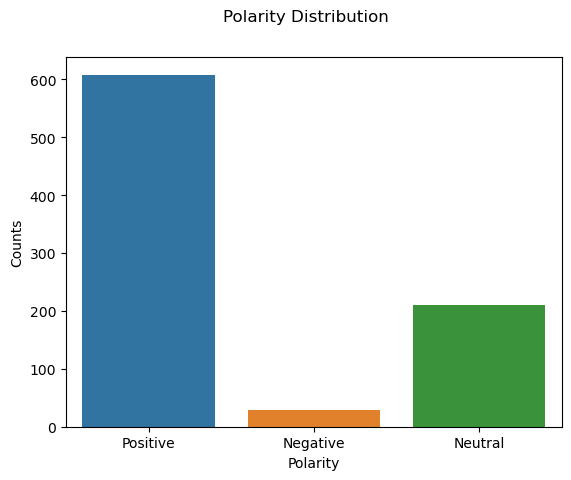

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
polarity_counts = {'Positive': 608, 'Negative': 29, 'Neutral': 210}

# Create a figure with multiple subplots
fig, ax = plt.subplots()

# Set the title for the entire figure
fig.suptitle('Polarity Distribution')

# Extract the polarity labels and counts
polarities = list(polarity_counts.keys())
counts = list(polarity_counts.values())

# Create a bar plot with the polarity counts
sns.barplot(x=polarities, y=counts, ax=ax)

# Set labels for x and y axes
ax.set_xlabel('Polarity')
ax.set_ylabel('Counts')

# Show the plot
plt.show()


## Conclution
 
Based on the sentiment analysis of the adjectives used to describe the iPhone 14, we can observe that the overall reception of the product is overwhelmingly positive. Out of the total adjectives analyzed, 608 were classified as positive, indicating that users have expressed high levels of satisfaction, excitement, and admiration for the iPhone 14. This significant number of positive adjectives highlights the product's exceptional qualities and features that have resonated well with users.

Additionally, we found that 210 adjectives were classified as neutral. These neutral adjectives suggest that some users may have provided a balanced perspective or simply focused on objective aspects of the iPhone 14 without expressing explicit positive or negative sentiments. While neutral adjectives don't necessarily indicate dissatisfaction, they do show a more measured or objective response from users.

On the other hand, the analysis revealed only 24 adjectives classified as negative. This relatively small number of negative adjectives indicates that the iPhone 14 has garnered minimal criticism or concerns from users. It suggests that the product has successfully addressed potential issues and met user expectations, resulting in a highly favorable reception overall.

The overwhelming positive sentiment expressed by the majority of users highlights the iPhone 14's success in delivering a remarkable user experience, innovative features, and impressive performance. The product's positive attributes, such as its reliability, speed, design, and overall user satisfaction, have resonated strongly with consumers. The limited number of negative adjectives further reinforces the iPhone 14's exceptional qualities and positions it as a highly regarded and sought-after device in the market.